In [2]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [3]:
animes = pd.read_csv('Data/animes.csv')
profiles = pd.read_csv('Data/profiles.csv')


In [4]:
animes[animes['title']== '[]']

,uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,score,img_url,link


In [5]:
profiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81727 entries, 0 to 81726
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   profile          81727 non-null  object
 1   gender           53856 non-null  object
 2   birthday         46807 non-null  object
 3   favorites_anime  81727 non-null  object
 4   link             81727 non-null  object
dtypes: object(5)
memory usage: 3.1+ MB


In [6]:
animes.drop_duplicates(inplace=True)

In [7]:
profiles.drop_duplicates(inplace=True)

In [8]:
profiles.head()

,profile,gender,birthday,favorites_anime,link
0,DesolatePsyche,Male,"Oct 2, 1994","['33352', '25013', '5530', '33674', '1482', '269', '18245', '2904', '27899', '17074', '12291', '226', '28851', '8525', '6594', '4981', '1698', '457', '235', '34618']",https://myanimelist.net/profile/DesolatePsyche
1,baekbeans,Female,"Nov 10, 2000","['11061', '31964', '853', '20583', '918', '9253', '34599', '3588', '13601', '6956']",https://myanimelist.net/profile/baekbeans
2,skrn,NaN,NaN,"['918', '2904', '11741', '17074', '23273', '32281', '9989', '1943', '512']",https://myanimelist.net/profile/skrn
3,edgewalker00,Male,Sep 5,"['5680', '849', '2904', '3588', '37349']",https://myanimelist.net/profile/edgewalker00
4,aManOfCulture99,Male,"Oct 30, 1999","['4181', '7791', '9617', '5680', '2167', '4382', '849', '235', '35180', '31646']",https://myanimelist.net/profile/aManOfCulture99


In [9]:
profiles['gender'].value_counts()

Male          21197
Female         9267
Non-Binary      426
Name: gender, dtype: int64

In [10]:
profiles[profiles['gender']=='Male']

,profile,gender,birthday,favorites_anime,link
0,DesolatePsyche,Male,"Oct 2, 1994","['33352', '25013', '5530', '33674', '1482', '269', '18245', '2904', '27899', '17074', '12291', '226', '28851', '8525', '6594', '4981', '1698', '457', '235', '34618']",https://myanimelist.net/profile/DesolatePsyche
3,edgewalker00,Male,Sep 5,"['5680', '849', '2904', '3588', '37349']",https://myanimelist.net/profile/edgewalker00
4,aManOfCulture99,Male,"Oct 30, 1999","['4181', '7791', '9617', '5680', '2167', '4382', '849', '235', '35180', '31646']",https://myanimelist.net/profile/aManOfCulture99
7,NIGGER_BONER,Male,"Jan 1, 1985","['11061', '30', '6594', '28701', '10087', '6746', '918', '1535', '24415', '5081']",https://myanimelist.net/profile/NIGGER_BONER
8,jchang,Male,"Jul 29, 1992","['846', '2904', '5114', '2924', '72']",https://myanimelist.net/profile/jchang
11,CalebTheMenace,Male,"Jun 29, 2004","['4181', '11617', '1735', '35849', '28999', '29803', '31964', '36098', '5081', '8525']",https://myanimelist.net/profile/CalebTheMenace
13,Eanki,Male,"Dec 3, 1995","['27989', '28851', '17265', '15227', '35557', '24', '5420', '4224', '23289', '31859']",https://myanimelist.net/profile/Eanki
14,NekoKyupi,Male,"Jan 8, 2001","['34599', '4181', '9756', '32949', '30654', '28851']",https://myanimelist.net/profile/NekoKyupi
16,OVERPOWERED99,Male,"Nov 16, 2000","['5680', '15051', '31953', '31964', '16498', '6213', '21647', '3455', '12189', '18679']",https://myanimelist.net/profile/OVERPOWERED99
17,MrAnimeCrunch,Male,NaN,[],https://myanimelist.net/profile/MrAnimeCrunch


In [11]:
non_empty_prof = profiles[profiles['favorites_anime']!='[]']

<AxesSubplot:>

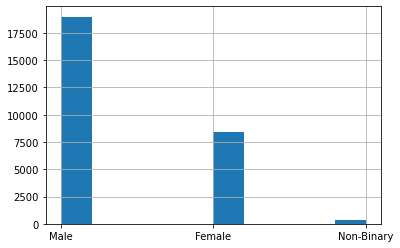

In [12]:
non_empty_prof['gender'].hist()

In [13]:
len(profiles['favorites_anime']), len(profiles[profiles['favorites_anime']!='[]'])

(47902, 37478)

In [14]:
non_empty_prof

,profile,gender,birthday,favorites_anime,link
0,DesolatePsyche,Male,"Oct 2, 1994","['33352', '25013', '5530', '33674', '1482', '269', '18245', '2904', '27899', '17074', '12291', '226', '28851', '8525', '6594', '4981', '1698', '457', '235', '34618']",https://myanimelist.net/profile/DesolatePsyche
1,baekbeans,Female,"Nov 10, 2000","['11061', '31964', '853', '20583', '918', '9253', '34599', '3588', '13601', '6956']",https://myanimelist.net/profile/baekbeans
2,skrn,NaN,NaN,"['918', '2904', '11741', '17074', '23273', '32281', '9989', '1943', '512']",https://myanimelist.net/profile/skrn
3,edgewalker00,Male,Sep 5,"['5680', '849', '2904', '3588', '37349']",https://myanimelist.net/profile/edgewalker00
4,aManOfCulture99,Male,"Oct 30, 1999","['4181', '7791', '9617', '5680', '2167', '4382', '849', '235', '35180', '31646']",https://myanimelist.net/profile/aManOfCulture99
5,eneri,NaN,NaN,"['5114', '4898', '2904', '1575', '1482']",https://myanimelist.net/profile/eneri
6,Waffle_Empress,NaN,"May 29, 1996","['338', '322', '440', '199', '28223', '12815', '2800', '18679', '387', '8129']",https://myanimelist.net/profile/Waffle_Empress
7,NIGGER_BONER,Male,"Jan 1, 1985","['11061', '30', '6594', '28701', '10087', '6746', '918', '1535', '24415', '5081']",https://myanimelist.net/profile/NIGGER_BONER
8,jchang,Male,"Jul 29, 1992","['846', '2904', '5114', '2924', '72']",https://myanimelist.net/profile/jchang
10,angelsreview,Female,"May 26, 1989","['534', '71', '7724', '861', '5060', '853']",https://myanimelist.net/profile/angelsreview


In [15]:
non_empty_prof2=non_empty_prof.copy()

In [16]:
non_empty_prof2['favorites_anime'] = non_empty_prof2.favorites_anime.apply(lambda x: ast.literal_eval(str(x)))

In [17]:
total_anime_id_list=[]
for i in non_empty_prof2['favorites_anime']:
    for ii in i:
        if ii not in total_anime_id_list:
            total_anime_id_list.append(ii)

In [18]:
non_empty_prof2

,profile,gender,birthday,favorites_anime,link
0,DesolatePsyche,Male,"Oct 2, 1994","[33352, 25013, 5530, 33674, 1482, 269, 18245, 2904, 27899, 17074, 12291, 226, 28851, 8525, 6594, 4981, 1698, 457, 235, 34618]",https://myanimelist.net/profile/DesolatePsyche
1,baekbeans,Female,"Nov 10, 2000","[11061, 31964, 853, 20583, 918, 9253, 34599, 3588, 13601, 6956]",https://myanimelist.net/profile/baekbeans
2,skrn,NaN,NaN,"[918, 2904, 11741, 17074, 23273, 32281, 9989, 1943, 512]",https://myanimelist.net/profile/skrn
3,edgewalker00,Male,Sep 5,"[5680, 849, 2904, 3588, 37349]",https://myanimelist.net/profile/edgewalker00
4,aManOfCulture99,Male,"Oct 30, 1999","[4181, 7791, 9617, 5680, 2167, 4382, 849, 235, 35180, 31646]",https://myanimelist.net/profile/aManOfCulture99
5,eneri,NaN,NaN,"[5114, 4898, 2904, 1575, 1482]",https://myanimelist.net/profile/eneri
6,Waffle_Empress,NaN,"May 29, 1996","[338, 322, 440, 199, 28223, 12815, 2800, 18679, 387, 8129]",https://myanimelist.net/profile/Waffle_Empress
7,NIGGER_BONER,Male,"Jan 1, 1985","[11061, 30, 6594, 28701, 10087, 6746, 918, 1535, 24415, 5081]",https://myanimelist.net/profile/NIGGER_BONER
8,jchang,Male,"Jul 29, 1992","[846, 2904, 5114, 2924, 72]",https://myanimelist.net/profile/jchang
10,angelsreview,Female,"May 26, 1989","[534, 71, 7724, 861, 5060, 853]",https://myanimelist.net/profile/angelsreview


In [19]:
male_non_empty_prof = non_empty_prof2[non_empty_prof2['gender']=='Male']
female_non_empty_prof = non_empty_prof2[non_empty_prof2['gender']=='Female']
non_binary_non_empty_prof  = non_empty_prof2[non_empty_prof2['gender']=='Non-Binary']

In [20]:
len(male_non_empty_prof),len(female_non_empty_prof),len(non_binary_non_empty_prof)

(18985, 8405, 360)

In [21]:
female_anime_list_dict = {}

for i in female_non_empty_prof['favorites_anime']:
    for ii in i:
        if ii not in female_anime_list_dict:
            female_anime_list_dict[ii]=1
        else:
            female_anime_list_dict[ii]+=1

In [22]:
male_anime_list_dict = {}

for i in male_non_empty_prof['favorites_anime']:
    for ii in i:
        if ii not in male_anime_list_dict:
            male_anime_list_dict[ii]=1
        else:
            male_anime_list_dict[ii]+=1
            

In [23]:
# sorted(male_anime_list_dict.items(), key = lambda kv:(kv[1], kv[0]), reverse=True)[0]
temp_male_anime_dict = {k: v for k, v in sorted(male_anime_list_dict.items(), key=lambda item: item[1],reverse=True)}
temp_male_anime_dict

{'9253': 3082,
 '5114': 2745,
 '4181': 1904,
 '2001': 1834,
 '1535': 1829,
 '11061': 1785,
 '1575': 1715,
 '1': 1540,
 '30': 1408,
 '21': 1289,
 '2904': 1192,
 '4224': 1079,
 '23273': 1008,
 '6547': 943,
 '16498': 934,
 '32281': 929,
 '9756': 924,
 '5081': 892,
 '918': 841,
 '11757': 835,
 '19': 806,
 '1210': 736,
 '28851': 725,
 '31240': 718,
 '30276': 711,
 '10087': 701,
 '19815': 695,
 '1735': 669,
 '457': 652,
 '13601': 632,
 '18679': 629,
 '269': 628,
 '227': 610,
 '820': 604,
 '2167': 599,
 '2251': 593,
 '205': 589,
 '13125': 578,
 '813': 569,
 '9989': 555,
 '2966': 539,
 '33': 532,
 '7785': 532,
 '17074': 527,
 '13759': 522,
 '263': 500,
 '34599': 490,
 '245': 485,
 '934': 471,
 '849': 466,
 '31964': 465,
 '30831': 455,
 '10620': 454,
 '121': 452,
 '10165': 438,
 '11741': 438,
 '32': 424,
 '6702': 421,
 '339': 418,
 '226': 416,
 '14719': 416,
 '6746': 415,
 '20': 411,
 '12189': 409,
 '392': 403,
 '14813': 400,
 '7311': 397,
 '31043': 395,
 '28171': 395,
 '22135': 394,
 '22535': 

In [24]:
# temp_female_anime_list = sorted(female_anime_list_dict.items(), key = lambda kv:(kv[1], kv[0]), reverse=True)
temp_female_anime_dict = {k: v for k, v in sorted(female_anime_list_dict.items(), key=lambda item: item[1],reverse=True)}
temp_female_anime_dict

{'5114': 1111,
 '1535': 842,
 '853': 721,
 '11061': 617,
 '16498': 585,
 '9756': 513,
 '9253': 485,
 '1575': 455,
 '21': 453,
 '20583': 448,
 '6746': 400,
 '4898': 396,
 '918': 388,
 '4181': 380,
 '6702': 349,
 '30': 341,
 '13601': 339,
 '4081': 319,
 '1': 317,
 '121': 316,
 '1735': 310,
 '269': 309,
 '249': 308,
 '32995': 304,
 '877': 298,
 '20507': 288,
 '2904': 277,
 '2251': 273,
 '7054': 269,
 '20': 268,
 '457': 265,
 '4224': 265,
 '6547': 255,
 '120': 252,
 '3588': 251,
 '199': 250,
 '28223': 235,
 '25013': 232,
 '23273': 231,
 '2001': 231,
 '13125': 227,
 '32281': 227,
 '1482': 221,
 '22319': 221,
 '19': 219,
 '431': 219,
 '934': 215,
 '232': 214,
 '14713': 210,
 '31964': 208,
 '11771': 208,
 '31043': 206,
 '205': 198,
 '10620': 191,
 '9989': 188,
 '11757': 184,
 '28851': 182,
 '18679': 181,
 '23283': 180,
 '530': 177,
 '1604': 176,
 '9919': 171,
 '2167': 170,
 '226': 170,
 '2034': 169,
 '6045': 168,
 '18507': 163,
 '721': 155,
 '30276': 154,
 '3457': 154,
 '23289': 149,
 '440': 

In [25]:
non_binary_anime_list_dict = {}

for i in non_binary_non_empty_prof['favorites_anime']:
    for ii in i:
        if ii not in non_binary_anime_list_dict:
            non_binary_anime_list_dict[ii]=1
        else:
            non_binary_anime_list_dict[ii]+=1
            

In [26]:
non_binary_anime_list_dict

{'820': 12,
 '7785': 10,
 '1': 27,
 '22135': 13,
 '43': 10,
 '585': 1,
 '7588': 1,
 '25835': 8,
 '2921': 1,
 '32': 13,
 '10165': 10,
 '35838': 6,
 '38753': 1,
 '227': 13,
 '10162': 8,
 '12355': 4,
 '35968': 5,
 '37450': 5,
 '35839': 10,
 '37991': 4,
 '5680': 5,
 '31988': 3,
 '27989': 9,
 '9756': 40,
 '39071': 1,
 '36286': 1,
 '31564': 1,
 '37579': 1,
 '19815': 8,
 '30831': 14,
 '31953': 5,
 '33731': 1,
 '33161': 1,
 '7791': 8,
 '232': 8,
 '11061': 24,
 '440': 12,
 '23623': 1,
 '2001': 22,
 '205': 11,
 '30': 36,
 '9926': 2,
 '14741': 12,
 '9989': 8,
 '23283': 5,
 '31964': 16,
 '10495': 5,
 '30276': 15,
 '28497': 1,
 '28621': 1,
 '387': 7,
 '31933': 13,
 '28851': 10,
 '467': 4,
 '323': 7,
 '1210': 11,
 '849': 8,
 '35677': 3,
 '31771': 1,
 '35848': 2,
 '32214': 1,
 '158': 1,
 '18679': 24,
 '9874': 1,
 '36990': 1,
 '37396': 1,
 '20583': 19,
 '36653': 1,
 '36704': 1,
 '31580': 1,
 '31478': 4,
 '31798': 2,
 '31043': 7,
 '6746': 9,
 '4081': 10,
 '5081': 11,
 '32867': 1,
 '16498': 8,
 '2246': 

In [27]:
# sorted(non_binary_anime_list_dict.items(), key = lambda kv:(kv[1], kv[0]), reverse=True)
temp_non_binary_anime_dict = {k: v for k, v in sorted(non_binary_anime_list_dict.items(), key=lambda item: item[1],reverse=True)}
temp_non_binary_anime_dict

{'9756': 40,
 '5114': 38,
 '30': 36,
 '1': 27,
 '32995': 26,
 '11061': 24,
 '18679': 24,
 '2001': 22,
 '9253': 22,
 '20583': 19,
 '918': 17,
 '1535': 17,
 '31964': 16,
 '30276': 15,
 '13125': 15,
 '339': 15,
 '457': 15,
 '32281': 15,
 '30831': 14,
 '32182': 14,
 '853': 14,
 '22135': 13,
 '32': 13,
 '227': 13,
 '31933': 13,
 '4181': 13,
 '820': 12,
 '440': 12,
 '14741': 12,
 '437': 12,
 '28223': 12,
 '205': 11,
 '1210': 11,
 '5081': 11,
 '934': 11,
 '164': 11,
 '34599': 11,
 '889': 11,
 '7785': 10,
 '43': 10,
 '10165': 10,
 '35839': 10,
 '28851': 10,
 '4081': 10,
 '35120': 10,
 '3588': 10,
 '33352': 10,
 '4224': 10,
 '27989': 9,
 '6746': 9,
 '2246': 9,
 '33255': 9,
 '17074': 9,
 '431': 9,
 '21': 9,
 '13601': 9,
 '11757': 9,
 '14719': 9,
 '25835': 8,
 '10162': 8,
 '19815': 8,
 '7791': 8,
 '232': 8,
 '9989': 8,
 '849': 8,
 '16498': 8,
 '239': 8,
 '121': 8,
 '22319': 8,
 '28735': 8,
 '30654': 8,
 '31240': 8,
 '6702': 8,
 '33': 8,
 '35557': 8,
 '33489': 8,
 '10161': 8,
 '10087': 8,
 '23273'

# show which is popular among male

In [28]:
sample=15

In [29]:
temp_list_male_anime=[i for i in temp_male_anime_dict.keys()]
temp_list_male_anime = temp_list_male_anime[:sample]

temp_list_male_anime_name=[]
for i in temp_list_male_anime:
    try:
        temp_list_male_anime_name.append(animes[animes['uid']==int(i)]['title'].values[0])
    except IndexError:
        pass

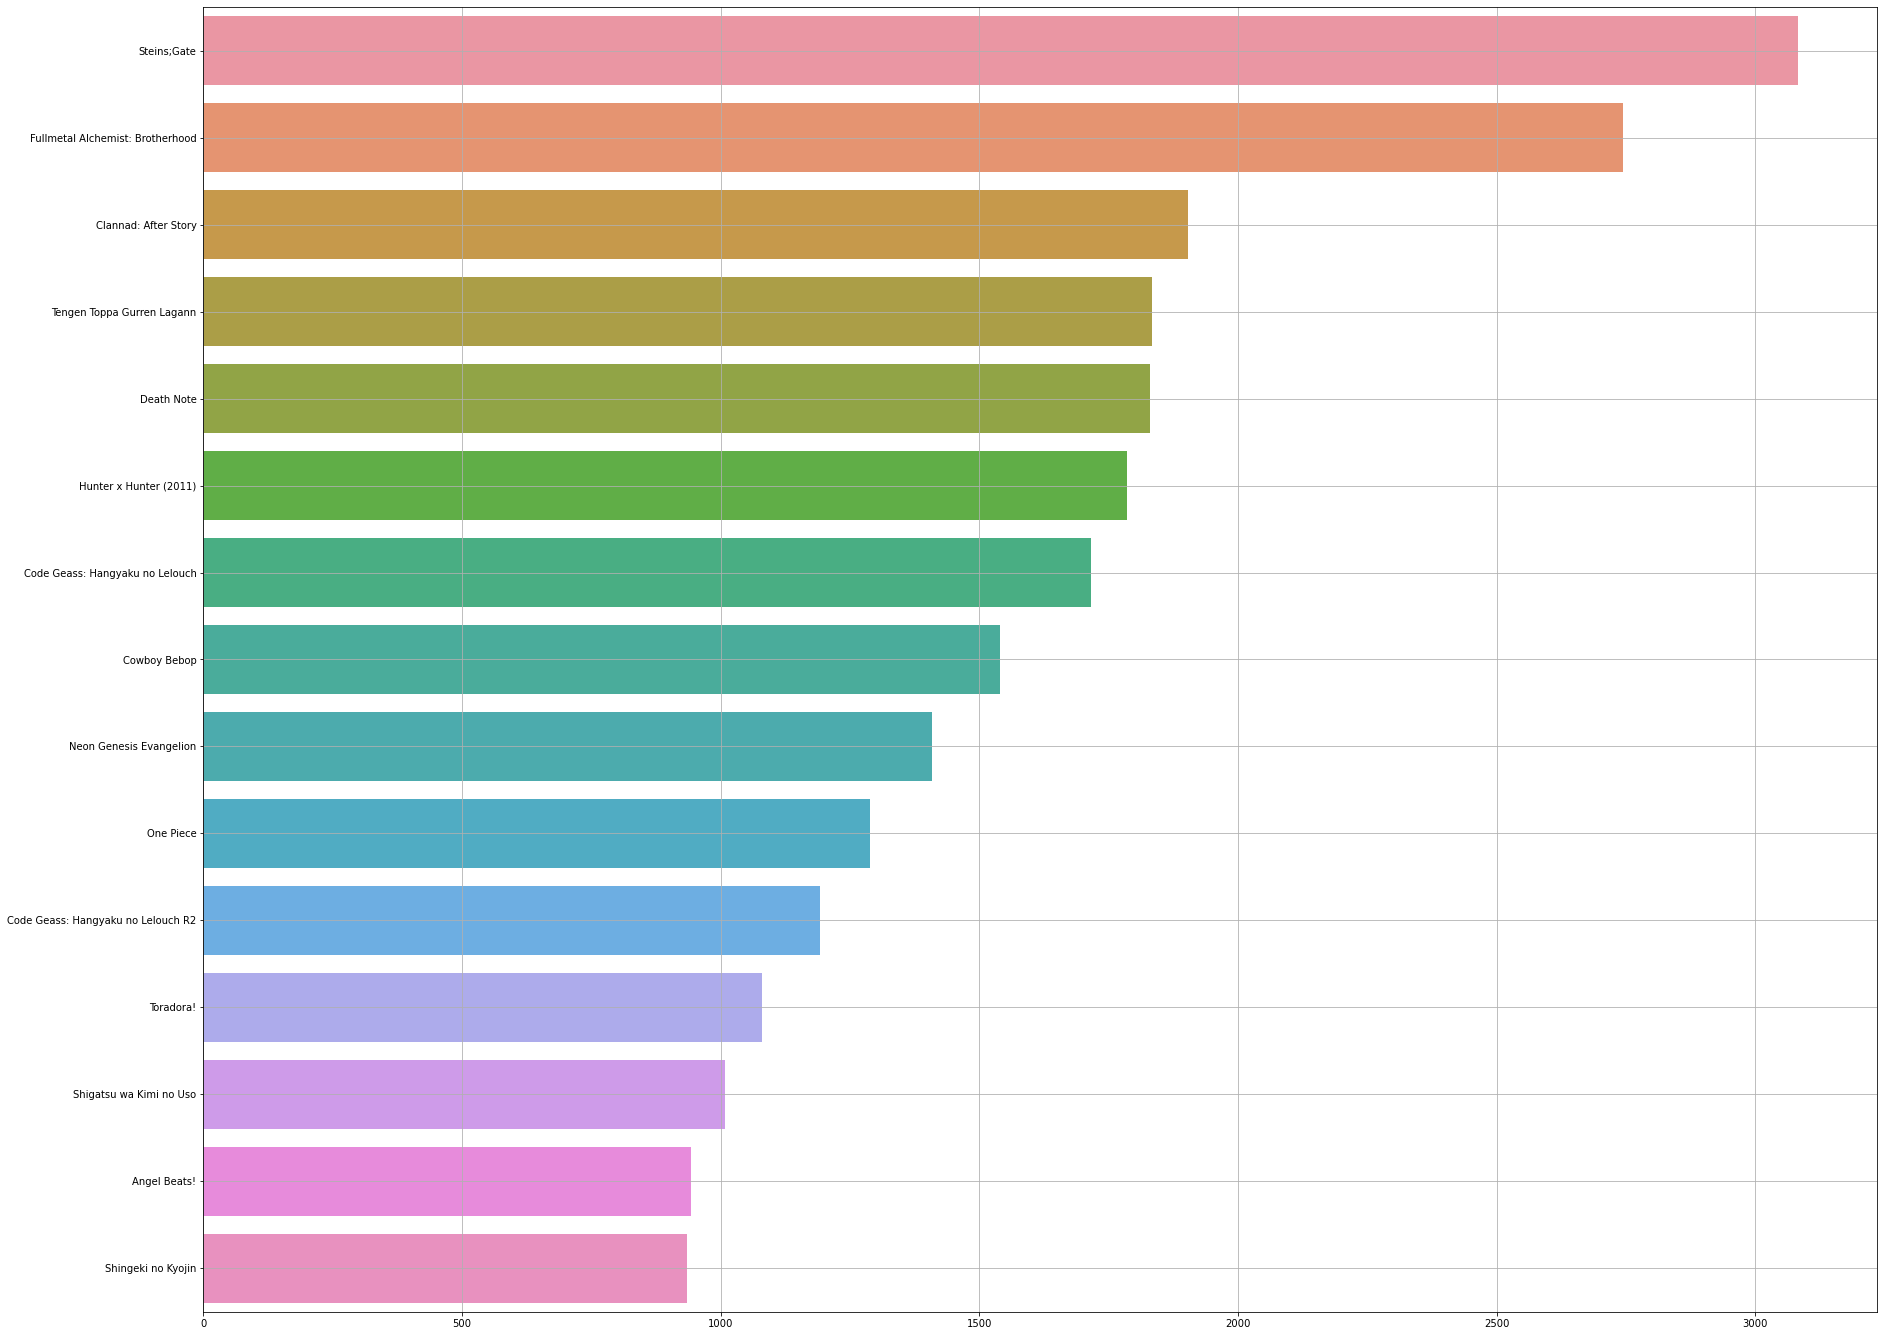

In [30]:
plt.figure(figsize=(30,24))
sns.barplot(y=temp_list_male_anime_name[:sample],x=[i for i in temp_male_anime_dict.values()][:sample])
plt.grid()

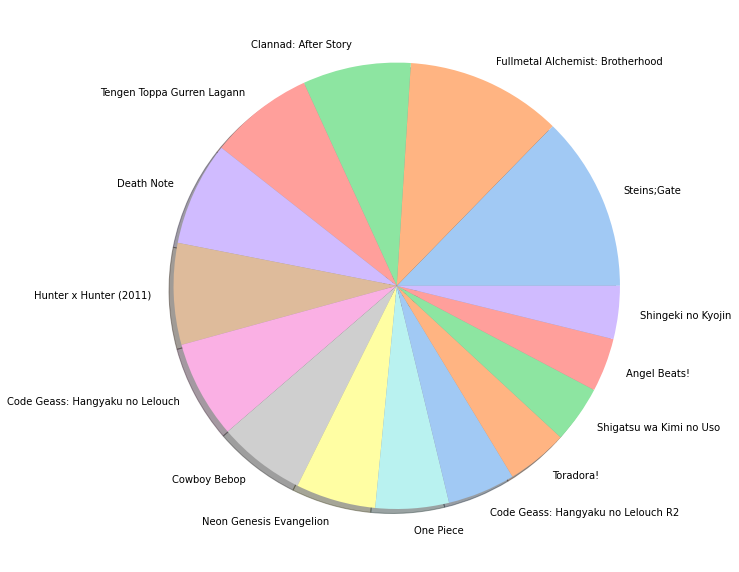

In [31]:
colors = sns.color_palette('pastel',as_cmap=True)[0:10]
plt.figure(figsize=(10,12))
plt.pie(labels=temp_list_male_anime_name[:sample],x=[i for i in temp_male_anime_dict.values()][:sample],colors=colors,shadow=True)
plt.show()

In [32]:
temp_list_male_anime=[i for i in temp_male_anime_dict.keys()]
temp_list_male_anime = temp_list_male_anime[:20]

# show which is popular among Female

In [33]:
sample = 10

In [34]:
[i for i in temp_male_anime_dict.values()][:10]

[3082, 2745, 1904, 1834, 1829, 1785, 1715, 1540, 1408, 1289]

In [35]:
temp_list_female_anime=[i for i in temp_female_anime_dict.keys()]
temp_list_female_anime = temp_list_female_anime[:sample]

temp_list_female_anime_name=[]
for i in temp_list_female_anime:
    try:
        temp_list_female_anime_name.append(animes[animes['uid']==int(i)]['title'].values[0])
    except IndexError:
        pass

In [36]:
temp_list_male_anime

['9253',
 '5114',
 '4181',
 '2001',
 '1535',
 '11061',
 '1575',
 '1',
 '30',
 '21',
 '2904',
 '4224',
 '23273',
 '6547',
 '16498',
 '32281',
 '9756',
 '5081',
 '918',
 '11757']

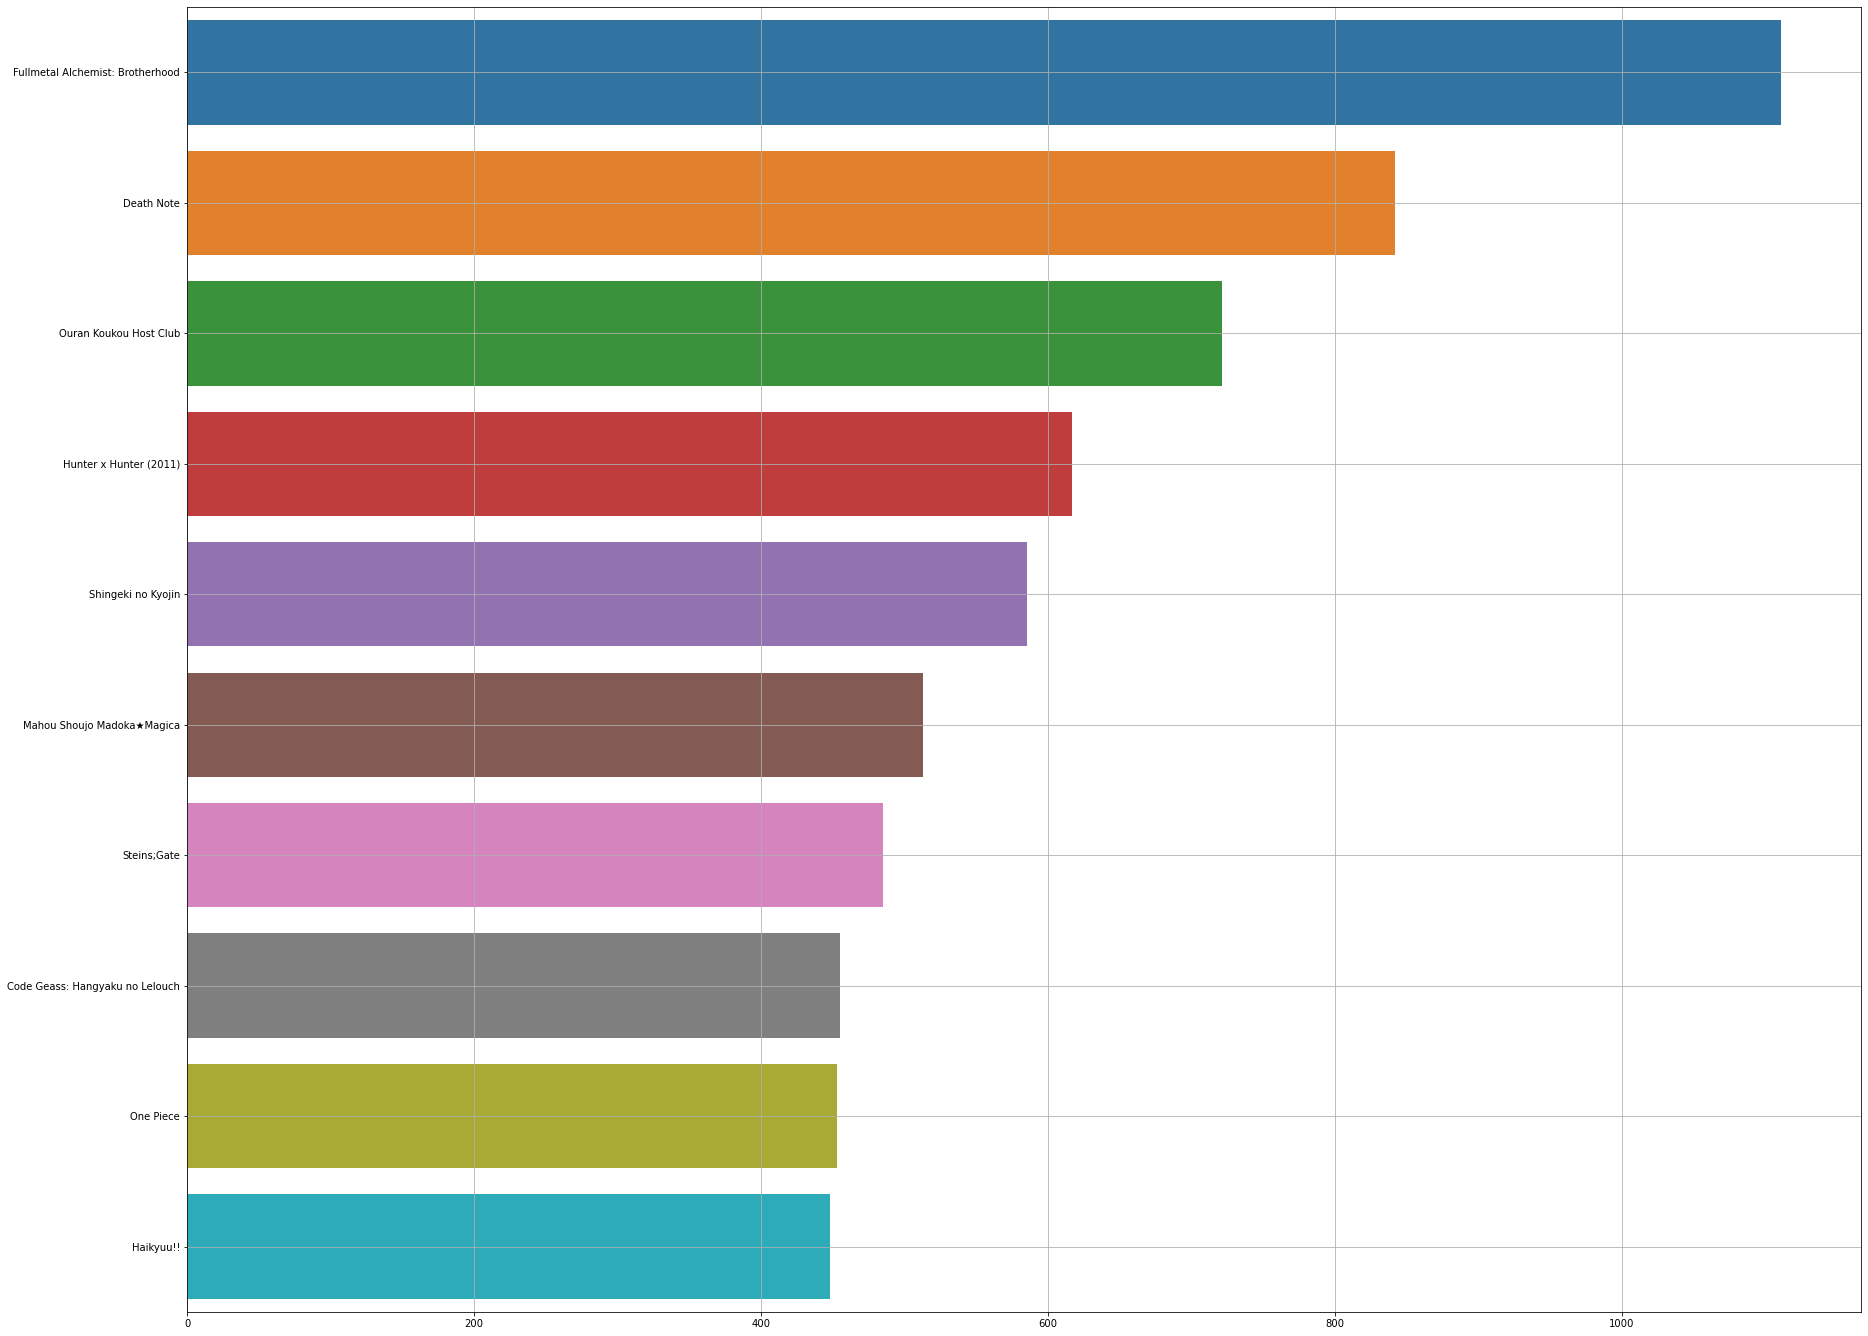

In [37]:
plt.figure(figsize=(30,24))
sns.barplot(y=temp_list_female_anime_name[:sample],x=[i for i in temp_female_anime_dict.values()][:sample])
plt.grid()

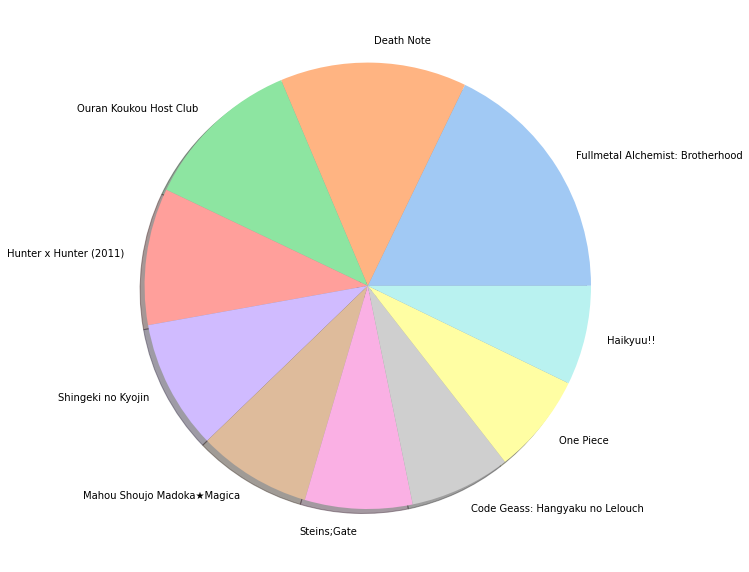

In [38]:
colors = sns.color_palette('pastel',as_cmap=True)[0:10]
plt.figure(figsize=(10,12))
plt.pie(labels=temp_list_female_anime_name[:sample],x=[i for i in temp_female_anime_dict.values()][:sample],colors=colors,shadow=True)
plt.show()

# show which is popular among Non-Binary

In [39]:
sample=10

In [40]:
temp_list_non_binary_anime=[i for i in temp_non_binary_anime_dict.keys()]
temp_list_non_binary_anime = temp_list_non_binary_anime[:sample]

temp_list_non_binary_anime_name=[]
for i in temp_list_non_binary_anime:
    try:
        temp_list_non_binary_anime_name.append(animes[animes['uid']==int(i)]['title'].values[0])
    except IndexError:
        pass

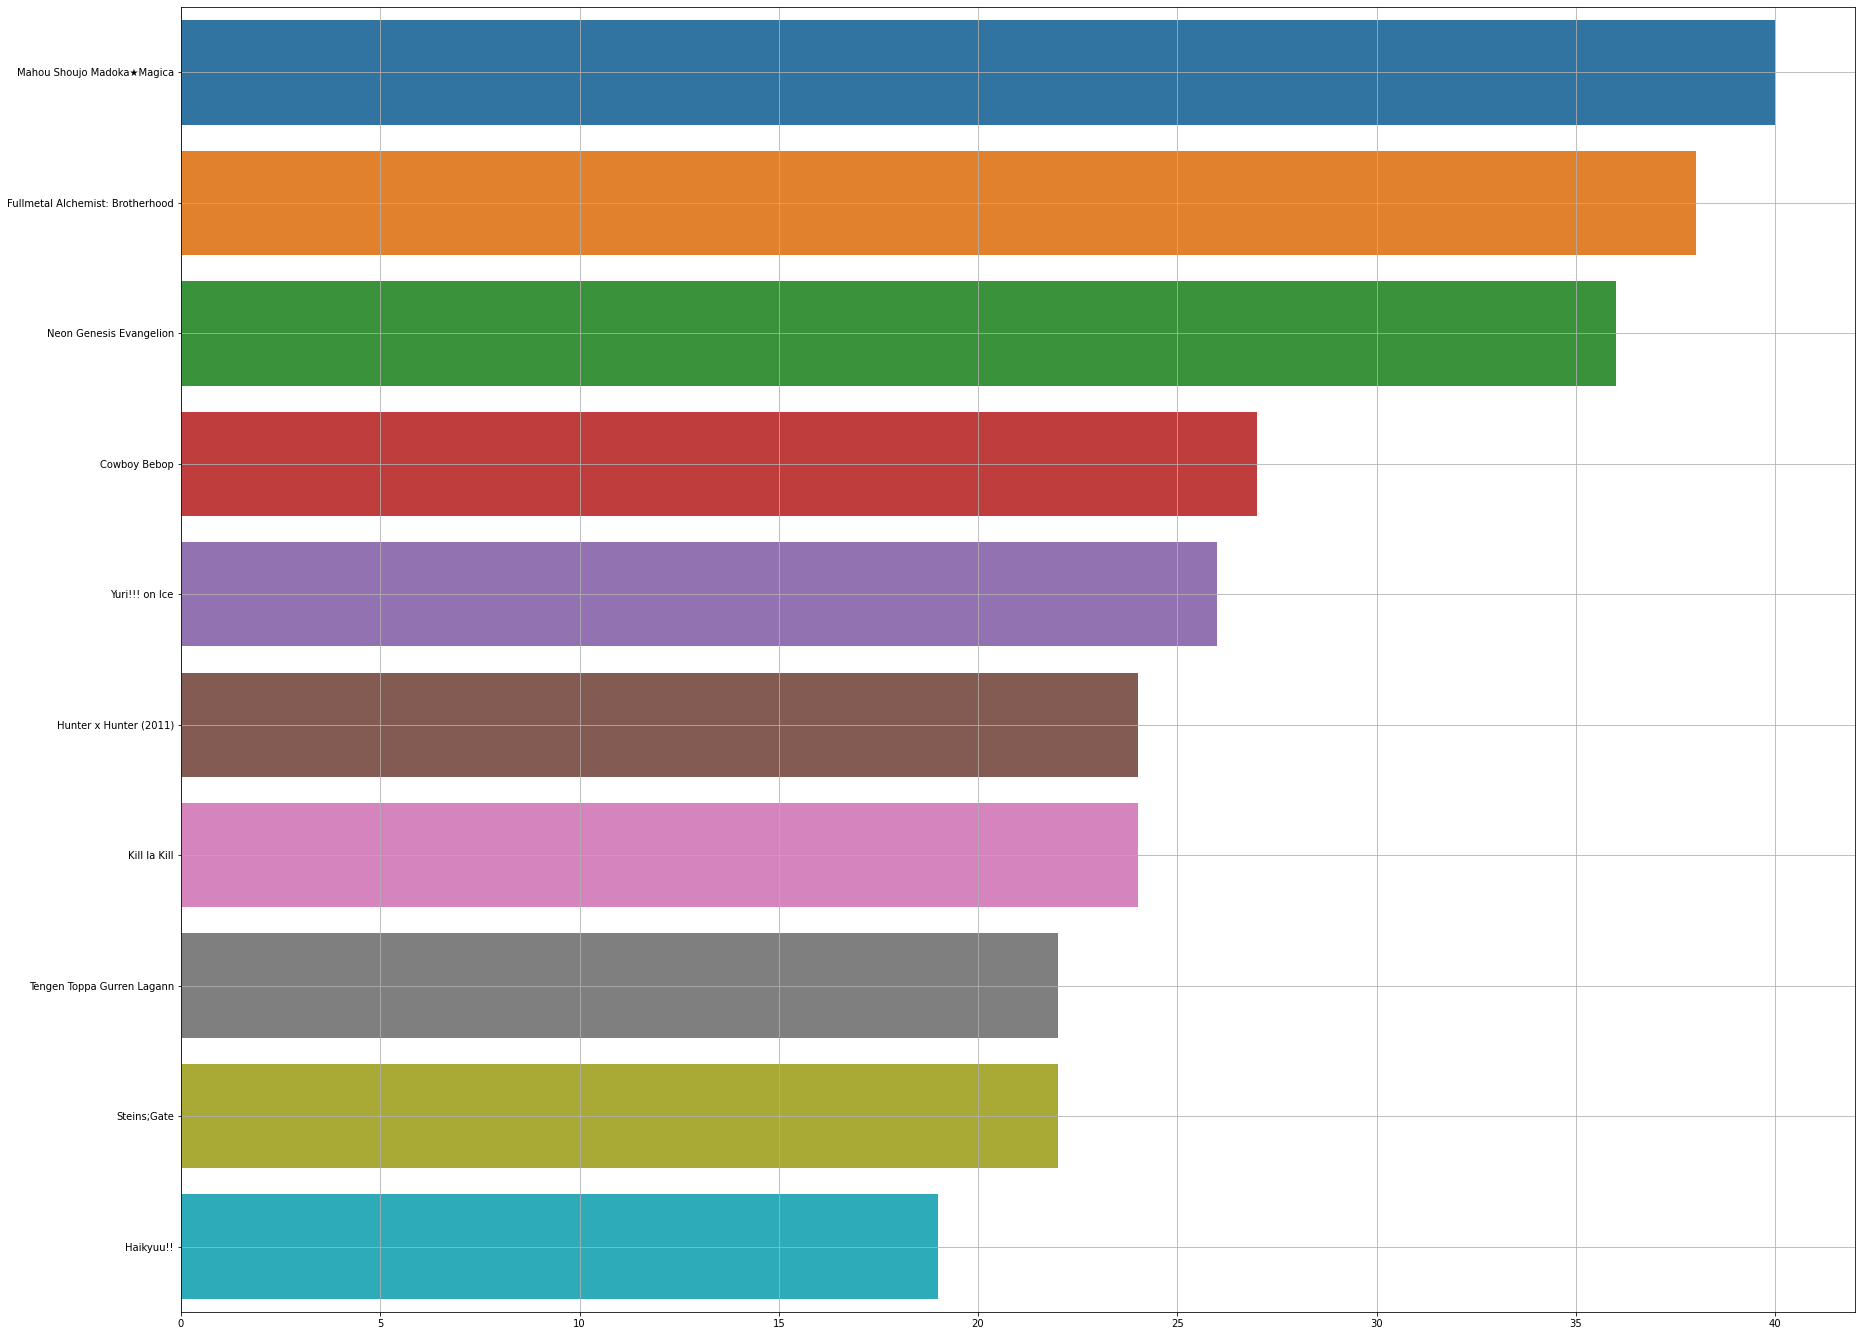

In [41]:
plt.figure(figsize=(30,24))
sns.barplot(y=temp_list_non_binary_anime_name[:sample],x=[i for i in temp_non_binary_anime_dict.values()][:sample])
plt.grid()

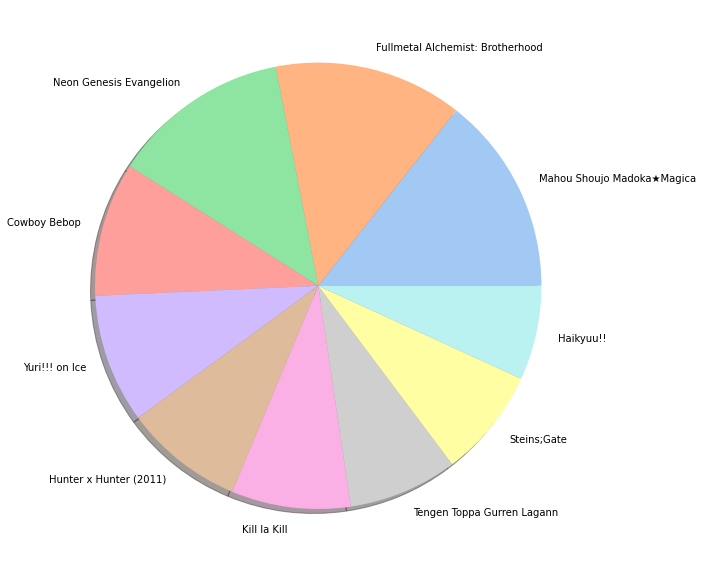

In [42]:
colors = sns.color_palette('pastel',as_cmap=True)
plt.figure(figsize=(10,12))
plt.pie(labels=temp_list_non_binary_anime_name[:sample],x=[i for i in temp_non_binary_anime_dict.values()][:sample],colors=colors,shadow=True)
plt.show()

# classification based on decades

In [43]:
non_empty_prof2.reset_index(drop=True, inplace=True)

In [44]:
list_of_years=[]
for i in range(len(non_empty_prof2['birthday'])):
    try:
        if len(non_empty_prof2['birthday'][i].split()[::-1][0])==4:
            list_of_years.append(non_empty_prof2['birthday'][i].split()[::-1][0].startswith(('19','20'))) 
        else:
            print(i)
            list_of_years.append(False)
    except AttributeError:
        list_of_years.append(False)


3
36
48
52
53
70
78
79
81
88
90
91
92
112
113
125
148
154
163
166
170
199
231
232
241
254
271
294
299
301
303
325
329
330
342
344
362
369
371
373
382
384
393
406
419
429
437
444
446
456
458
462
482
489
490
493
505
508
514
521
547
549
550
554
555
558
562
564
567
570
584
600
611
616
619
622
634
666
682
683
689
698
707
720
721
723
727
728
748
764
766
767
776
795
797
799
804
807
813
820
823
825
827
828
830
838
840
841
844
856
871
879
892
908
923
928
972
975
994
1007
1011
1012
1017
1044
1048
1058
1064
1072
1073
1074
1078
1080
1082
1090
1092
1096
1100
1112
1114
1120
1124
1134
1140
1152
1183
1214
1234
1257
1259
1265
1310
1323
1334
1336
1338
1340
1342
1373
1374
1400
1402
1404
1415
1422
1426
1427
1447
1453
1457
1464
1481
1487
1507
1516
1525
1530
1531
1533
1535
1544
1549
1567
1580
1595
1600
1602
1608
1620
1624
1633
1634
1645
1651
1694
1696
1701
1706
1711
1724
1730
1731
1749
1752
1754
1756
1758
1769
1781
1782
1784
1793
1796
1802
1809
1825
1845
1857
1867
1870
1873
1886
1891
1902
1934
1943
1956
196

22352
22376
22378
22380
22398
22416
22466
22478
22482
22494
22495
22503
22543
22552
22554
22557
22562
22589
22605
22639
22647
22651
22654
22656
22685
22722
22728
22740
22742
22746
22753
22758
22761
22771
22786
22792
22795
22815
22841
22853
22869
22877
22901
22903
22912
22913
22924
22928
22929
22941
22942
22964
22969
22970
22983
22989
22993
23004
23010
23013
23018
23020
23029
23036
23065
23074
23076
23079
23081
23087
23094
23110
23111
23114
23124
23127
23130
23137
23156
23162
23167
23168
23192
23202
23212
23216
23218
23228
23238
23241
23243
23253
23255
23257
23263
23273
23274
23279
23298
23313
23316
23321
23322
23335
23341
23350
23375
23378
23387
23399
23402
23406
23415
23447
23451
23467
23471
23482
23496
23503
23508
23510
23512
23515
23526
23527
23560
23585
23593
23601
23607
23618
23631
23634
23639
23640
23644
23649
23651
23665
23666
23673
23681
23720
23727
23741
23742
23756
23768
23774
23781
23783
23791
23794
23801
23804
23829
23843
23847
23850
23870
23876
23892
23893
23894
23905
2391

In [45]:
year_avail_prof = non_empty_prof2[list_of_years] 
year_avail_prof.reset_index(drop=True,inplace=True)

In [46]:
def replace_year(year):
    x=year_avail_prof['birthday'][2].split()[-1]
    x=x.replace(x,x[0:3]+'0')
    return x

replace_year(8)

'1990'

In [47]:
years=[]
for i in year_avail_prof['birthday']:
    years.append(i.split()[-1])

In [48]:
year_avail_prof['year']=years

<ipython-input-48-ee35ed986d05>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_avail_prof['year']=years


In [49]:
check=[]
for year in range(len(year_avail_prof)):
    check.append(year_avail_prof['birthday'][year].split()[-1] == year_avail_prof['year'][year])
    
False in check

False

In [50]:
year_avail_prof.head()

,profile,gender,birthday,favorites_anime,link,year
0,DesolatePsyche,Male,"Oct 2, 1994","[33352, 25013, 5530, 33674, 1482, 269, 18245, 2904, 27899, 17074, 12291, 226, 28851, 8525, 6594, 4981, 1698, 457, 235, 34618]",https://myanimelist.net/profile/DesolatePsyche,1994
1,baekbeans,Female,"Nov 10, 2000","[11061, 31964, 853, 20583, 918, 9253, 34599, 3588, 13601, 6956]",https://myanimelist.net/profile/baekbeans,2000
2,aManOfCulture99,Male,"Oct 30, 1999","[4181, 7791, 9617, 5680, 2167, 4382, 849, 235, 35180, 31646]",https://myanimelist.net/profile/aManOfCulture99,1999
3,Waffle_Empress,NaN,"May 29, 1996","[338, 322, 440, 199, 28223, 12815, 2800, 18679, 387, 8129]",https://myanimelist.net/profile/Waffle_Empress,1996
4,NIGGER_BONER,Male,"Jan 1, 1985","[11061, 30, 6594, 28701, 10087, 6746, 918, 1535, 24415, 5081]",https://myanimelist.net/profile/NIGGER_BONER,1985


In [51]:
decades=[]
for i in year_avail_prof['year']:
    decades.append(i[:-1]+'0')

In [52]:
year_avail_prof['decade']=decades

<ipython-input-52-99bbf26017af>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_avail_prof['decade']=decades


In [53]:
year_avail_prof.tail(3)

,profile,gender,birthday,favorites_anime,link,year,decade
20401,Akuteru,Male,"Aug 30, 1993","[6624, 20785, 17265, 28121]",https://myanimelist.net/profile/Akuteru,1993,1990
20402,Razielek,Male,"Nov 8, 1986","[47, 523, 820, 30, 339]",https://myanimelist.net/profile/Razielek,1986,1980
20403,bridgesams,Male,"Jan 1, 2001","[37510, 35180, 30, 31043, 5081, 37450, 11843]",https://myanimelist.net/profile/bridgesams,2001,2000


In [ ]:
plt.figure(figsize=(30,24))
sns.barplot(y=year_avail_prof['decade'],x=year_avail_prof[''])
plt.grid()

In [55]:
dum_dict={}
for i in range(len(year_avail_prof)):
    if i not in dum_dict:
        dum_dict[year_avail_prof.iloc[i]['decade']]={}
    else:
        pass

In [56]:
decade_dict = {k: v for k, v in sorted(dum_dict.items(), key=lambda item: item[0],reverse=False)}
decade_dict

{'1930': {},
 '1940': {},
 '1950': {},
 '1960': {},
 '1970': {},
 '1980': {},
 '1990': {},
 '2000': {},
 '2010': {},
 '2020': {}}

In [57]:
for i in range(len(year_avail_prof)):
    decade=year_avail_prof.iloc[i]['decade']
    for j in year_avail_prof.iloc[i]['favorites_anime']:
        temp_dic={}
        if j not in decade_dict[decade]:
            decade_dict[decade][j]=1
        else:
            decade_dict[decade][j]+=1

In [59]:
final_dict={}
for i in decade_dict.keys():
    final_dict[i]={k: v for k, v in sorted(decade_dict[i].items(), key=lambda item: item[1],reverse=True)}

In [63]:
final_dict.keys()

dict_keys(['1930', '1940', '1950', '1960', '1970', '1980', '1990', '2000', '2010', '2020'])

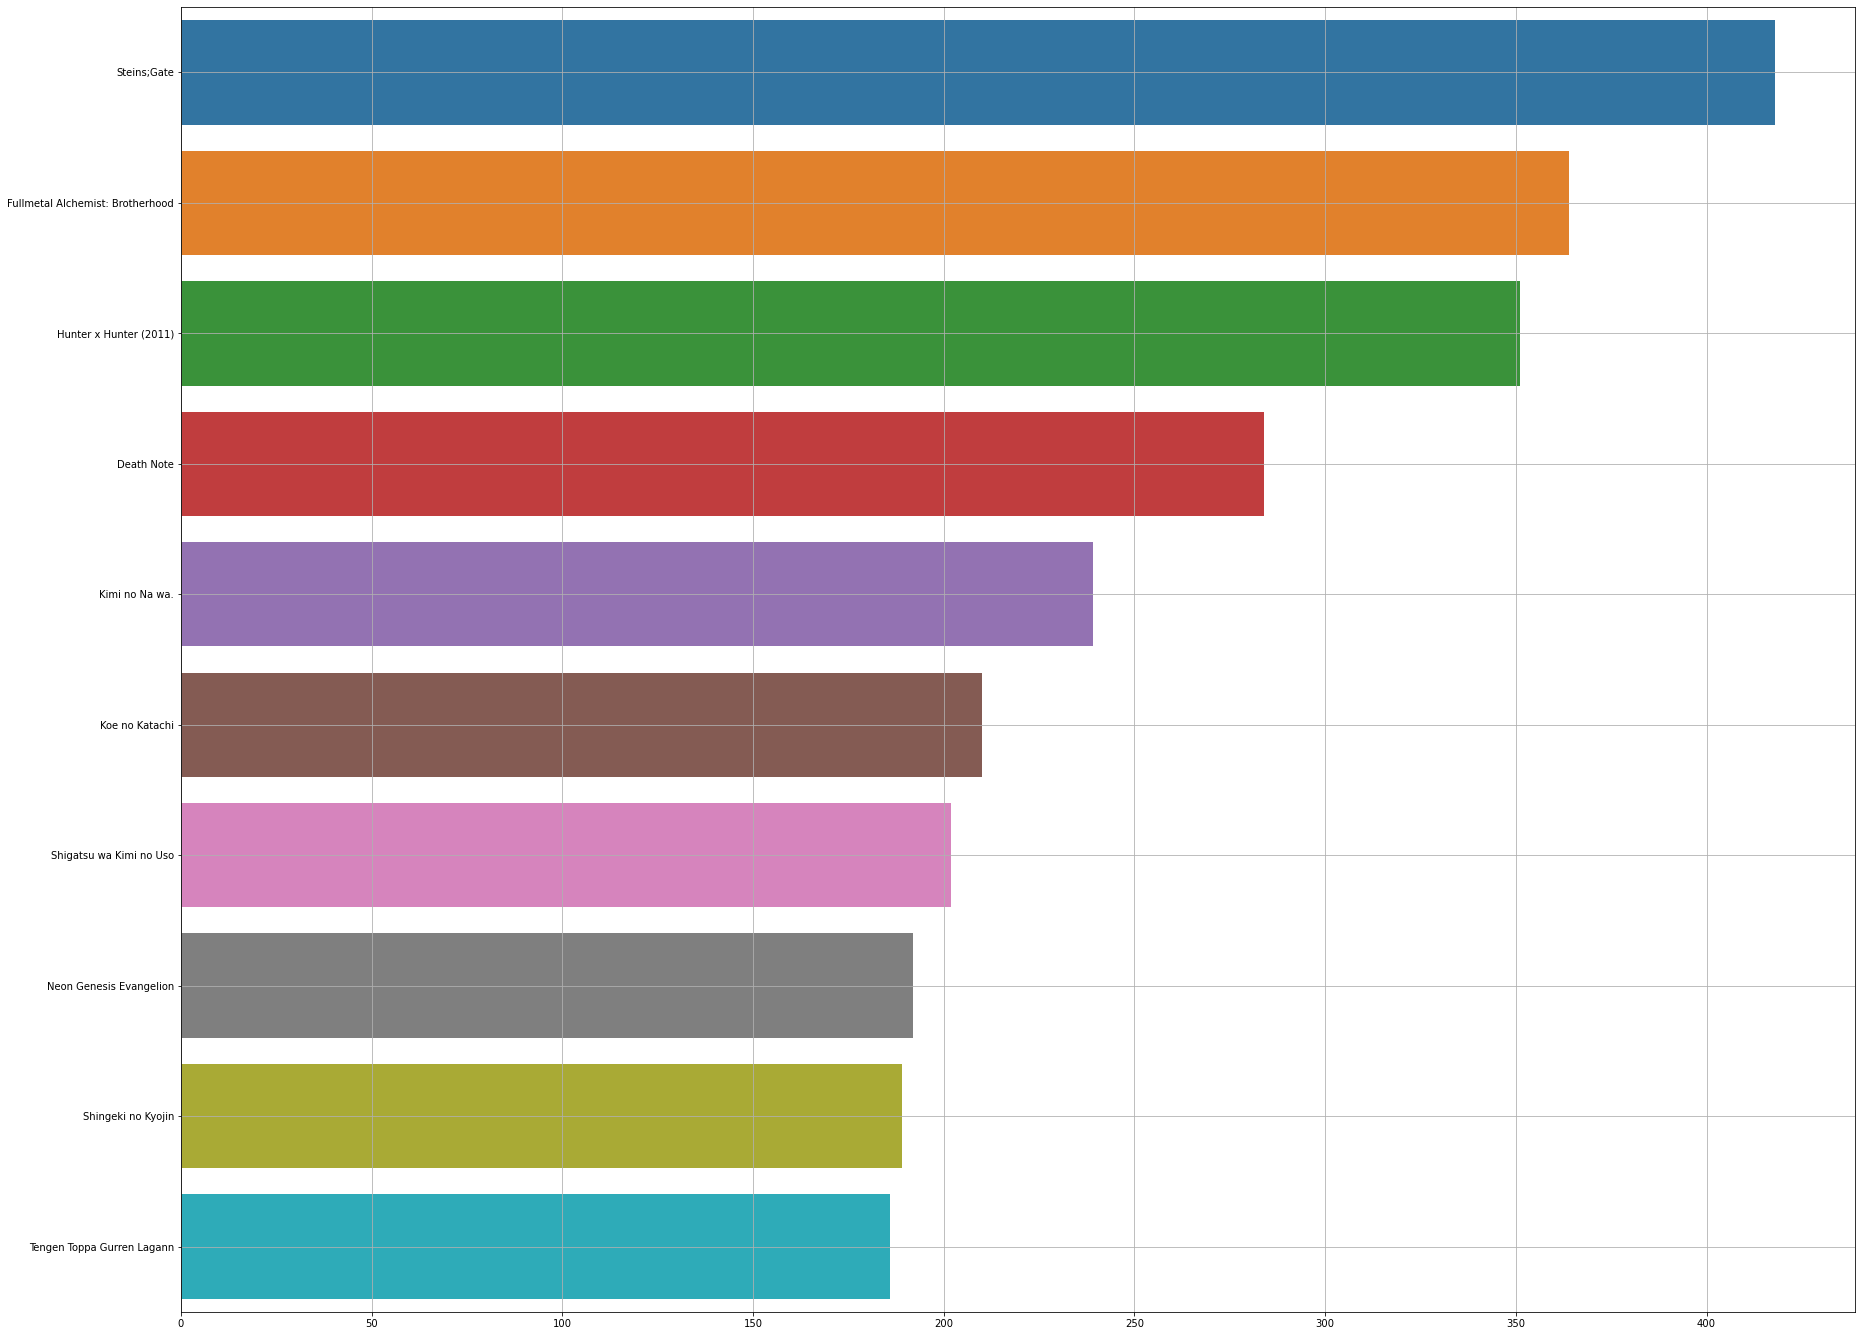

In [77]:
def plot_decade_fav(year, sample):
    temp_list_decade_fav=[i for i in final_dict[year].keys()]
    temp_list_decade_fav = temp_list_decade_fav[:sample]
    
    temp_list_decade_fav_anime_name=[]
    for i in temp_list_decade_fav:
        try:
            temp_list_decade_fav_anime_name.append(animes[animes['uid']==int(i)]['title'].values[0])
        except IndexError:
            pass
    plt.figure(figsize=(30,24))
    sns.barplot(y=temp_list_decade_fav_anime_name[:sample],x=[i for i in final_dict[year].values()][:sample])
    plt.grid()

plot_decade_fav('2000',10)